# 7. Projeto de Filtros FIR

##  Preliminares: Fundamentos de Projeto de Filtros Digitais

## As Três Etapas Essenciais

### 1. Especificações
**Definição dos requisitos:**
- **Aplicações típicas:** Processamento de voz, áudio, telecomunicações
- **Parâmetros chave:**
  - Banda de passagem
  - Banda de rejeição
  - Tolerâncias (ripple)
  - Resposta de fase (especialmente para FIR)

### 2. Aproximação
**Conversão matemática:**
- FIR vs IIR:
  - **FIR:**
    $$ H(z) = \sum_{k=0}^{M} b_k z^{-k} $$
    - Vantagem: Fase linear exata
  - **IIR:**
    $$ H(z) = \frac{\sum_{k=0}^{M} b_k z^{-k}}{1 + \sum_{k=1}^{N} a_k z^{-k}} $$
    - Vantagem: Eficiência computacional

### 3. Implementação
**Opções práticas:**
- Hardware dedicado (DSPs, FPGAs)
- Software (bibliotecas como SciPy, MATLAB)
- Tipos de estruturas:
  - Forma direta
  - Cascata
  - Paralela

## Tipos de Especificações

### Especificações Absolutas
$$ |H(e^{j\omega})| \begin{cases}
= 1 \pm \delta_p & \text{na passabanda} \\
\leq \delta_s & \text{na banda de rejeição}
\end{cases} $$

### Especificações Relativas (dB)
$$ -20 \log_{10} \left( \frac{|H(e^{j\omega})|}{|H(e^{j\omega})|_{\text{max}}} \right) \geq \begin{cases}
A_p & \text{(ripple na passabanda)} \\
A_s & \text{(atenuação na stopband)}
\end{cases} $$


## Propriedades de Filtros FIR com Fase Linear


### 1. Resposta ao Impulso $ h(n) $
Para um filtro FIR de comprimento $ M $ ter fase linear exata, sua resposta ao impulso deve satisfazer uma das seguintes condições de simetria:

**Simetria Par (Tipos I e II)**:
$$ h(n) = h(M-1-n), \quad 0 \leq n \leq M-1 $$

**Simetria Ímpar (Tipos III e IV)**:
$$ h(n) = -h(M-1-n), \quad 0 \leq n \leq M-1 $$

#### Classificação por Tipo:
| Tipo | Comprimento $ M $ | Simetria | Característica Chave |
|------|---------------------|----------|----------------------|
| I    | Ímpar               | Par      | Sem restrições adicionais |
| II   | Par                 | Par      | Zero obrigatório em $ \omega = \pi $ |
| III  | Ímpar               | Ímpar    | Zeros em $ \omega = 0 $ e $ \pi $ |
| IV   | Par                 | Ímpar    | Zero obrigatório em $ \omega = 0 $ |

### 2. Resposta em Frequência $ H(e^{j\omega}) $
A resposta em frequência de filtros com fase linear pode ser expressa na forma:

$$ H(e^{j\omega}) = A(\omega)e^{-j\left( \alpha\omega + \beta \right)} $$

Onde:
- $ A(\omega) $: Função de amplitude real (pode assumir valores negativos)
- $ \alpha = \frac{M-1}{2} $: Atraso de grupo constante
- $ \beta $: Constante de fase ($ 0 $ para Tipos I/II, $ \frac{\pi}{2} $ para Tipos III/IV)

#### Formas de $ A(\omega) $ por Tipo:
1. **Tipo I**:
   $$ A(\omega) = \sum_{k=0}^{(M-1)/2} a_k \cos(\omega k) $$

2. **Tipo II**:
   $$ A(\omega) = \sum_{k=1}^{M/2} b_k \cos\left[\omega\left(k-\frac{1}{2}\right)\right] $$

3. **Tipo III**:
   $$ A(\omega) = \sum_{k=1}^{(M-1)/2} c_k \sin(\omega k) $$

4. **Tipo IV**:
   $$ A(\omega) = \sum_{k=1}^{M/2} d_k \sin\left[\omega\left(k-\frac{1}{2}\right)\right] $$

### 3. Propriedades dos Zeros
A localização dos zeros na plano $ z $ obedece a:
1. **Simetria Quadrupla** para zeros complexos não-unitários:
   - Se $ z_0 $ é zero, então $ z_0^* $, $ 1/z_0 $, e $ 1/z_0^* $ também são zeros

2. **Simetria Simples** para zeros reais ou na circunferência unitária:
   - Zeros reais: $ z_0 $ e $ 1/z_0 $
   - Zeros unitários: Pares conjugados $ z_0 $ e $ z_0^* $

### 4. Aplicações por Tipo
| Tipo | Aplicações Típicas | Restrições de Projeto |
|------|--------------------|-----------------------|
| I    | Filtros padrão (passa-baixas, passa-altas, etc.) | Nenhuma |
| II   | Filtros passa-baixas | Não adequado para passa-altas |
| III  | Diferenciadores, transformadores de Hilbert | Não pode ser usado em filtros passa-baixas |
| IV   | Transformadores de Hilbert | Não pode ser usado em filtros passa-altas |


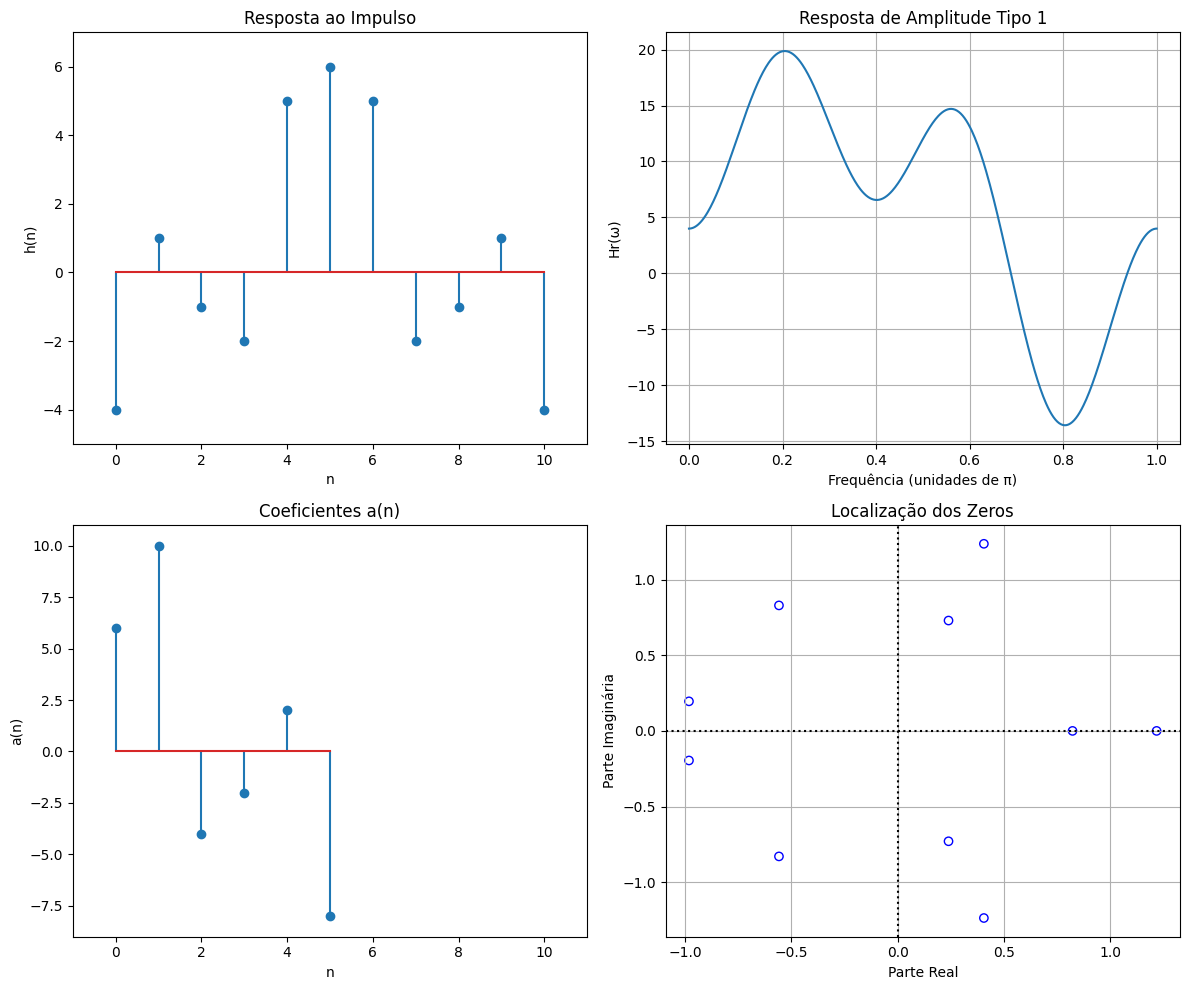

Coeficientes a(n): [ 6 10 -4 -2  2 -8]
Ordem L: 5

Zeros do sistema:
Zero 1: -0.9807+0.1956j
Zero 2: -0.9807-0.1956j
Zero 3: -0.5578+0.8300j
Zero 4: -0.5578-0.8300j
Zero 5: 0.4052+1.2374j
Zero 6: 0.4052-1.2374j
Zero 7: 1.2169+0.0000j
Zero 8: 0.8218+0.0000j
Zero 9: 0.2390+0.7299j
Zero 10: 0.2390-0.7299j


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, tf2zpk

# Exemplo 7.4 - Análise de Filtro FIR Tipo 1

def hr_type1(h):
    """Calcula a resposta de amplitude para filtros Tipo 1"""
    M = len(h)
    L = (M - 1) // 2
    a = np.concatenate(([h[L]], 2 * h[L-1::-1]))  # Coeficientes a(n)
    w = np.linspace(0, np.pi, 500)  # 500 pontos entre 0 e pi
    Hr = np.zeros_like(w)

    for k in range(L + 1):
        Hr += a[k] * np.cos(k * w)

    return Hr, w, a, L

h = np.array([-4, 1, -1, -2, 5, 6, 5, -2, -1, 1, -4])
M = len(h)
n = np.arange(M)

Hr, w, a, L = hr_type1(h)

# Obter zeros da função de transferência
zeros, poles, _ = tf2zpk(h, [1])

plt.figure(figsize=(12, 10))

# 1. Resposta ao Impulso
plt.subplot(2, 2, 1)
plt.stem(n, h)
plt.axis([-1, 2*L+1, min(h)-1, max(h)+1])
plt.xlabel('n')
plt.ylabel('h(n)')
plt.title('Resposta ao Impulso')

# 2. Coeficientes a(n)
plt.subplot(2, 2, 3)
plt.stem(np.arange(L + 1), a)
plt.axis([-1, 2*L+1, min(a)-1, max(a)+1])
plt.xlabel('n')
plt.ylabel('a(n)')
plt.title('Coeficientes a(n)')

# 3. Resposta de Amplitude
plt.subplot(2, 2, 2)
plt.plot(w/np.pi, Hr)
plt.grid()
plt.xlabel('Frequência (unidades de π)')
plt.ylabel('Hr(ω)')
plt.title('Resposta de Amplitude Tipo 1')

# 4. Diagrama de Polos e Zeros
plt.subplot(2, 2, 4)
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', facecolors='none', edgecolors='b')
plt.axhline(0, color='k', linestyle=':')
plt.axvline(0, color='k', linestyle=':')
plt.grid()
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Localização dos Zeros')

plt.tight_layout()
plt.show()

print("Coeficientes a(n):", a)
print("Ordem L:", L)
print("\nZeros do sistema:")
for i, zero in enumerate(zeros):
    print(f"Zero {i+1}: {zero:.4f}")

##  Técnicas de Projeto por Janelamento


### Conceito Central
O método de janelamento consiste em:
1. Escolher um **filtro seletivo ideal** $H_d(e^{j\omega})$ (não-causal e de resposta infinita)
2. **Truncar sua resposta ao impulso** $h_d(n)$ usando uma função de janela
3. Obter um **filtro FIR causal** com fase linear

### Filtro Passa-Baixas Ideal
Para um LPF com frequência de corte $\omega_c$:

$$
H_d(e^{j\omega}) = \begin{cases}
e^{-j\alpha\omega}, & |\omega| \leq \omega_c \\
0, & \omega_c < |\omega| \leq \pi
\end{cases}
$$

**Resposta ao Impulso**:
$$
h_d(n) = \frac{\sin[\omega_c(n - \alpha)]}{\pi(n - \alpha)}
$$
onde $\alpha = \frac{M-1}{2}$ é o atraso de grupo.

## Implementação por Janelamento

### Processo Básico
1. **Truncamento**:
   $$ h(n) = \begin{cases}
   h_d(n) \cdot w(n), & 0 \leq n \leq M-1 \\
   0, & \text{caso contrário}
   \end{cases} $$

2. **Critérios de Seleção**:
   - Largura do lóbulo principal → Controla a banda de transição
   - Atenuação do lóbulo lateral → Controla ripple na banda de rejeição

## Janelas Clássicas

### 7.3.1 Janela Retangular
$$ w(n) = 1, \quad 0 \leq n \leq M-1 $$

**Características**:
- Lóbulo principal mais estreito (4π/M)
- Alta ondulação nos lóbulos laterais (-13 dB)

### 7.3.2 Janela de Bartlett (Triangular)
$$ w(n) = 1 - \left|\frac{2n}{M-1} - 1\right| $$

**Características**:
- Lóbulo principal mais largo (8π/M)
- Atenuação melhorada (-25 dB)

### 7.3.3 Janela de Hann
$$ w(n) = 0.5 \left[1 - \cos\left(\frac{2\pi n}{M-1}\right)\right] $$

**Características**:
- Compromisso entre largura e atenuação (-31 dB)
- Lóbulo principal: 8π/M

### 7.3.4 Janela de Hamming
$$ w(n) = 0.54 - 0.46 \cos\left(\frac{2\pi n}{M-1}\right) $$

**Características**:
- Lóbulo lateral mínimo (-41 dB)
- Amplamente utilizada em projetos práticos

### 7.3.5 Janela de Blackman
$$ w(n) = 0.42 - 0.5 \cos\left(\frac{2\pi n}{M-1}\right) + 0.08 \cos\left(\frac{4\pi n}{M-1}\right) $$

**Características**:
- Melhor atenuação (-57 dB)
- Lóbulo principal mais largo (12π/M)

## Tabela Comparativa
| Janela          | Largura Lóbulo Principal | Atenuação (dB) | Ripple na Banda de Passagem |
|-----------------|--------------------------|----------------|-----------------------------|
| Retangular      | $4\pi/M$                | -13            | 0.7416                      |
| Bartlett        | $8\pi/M$                | -25            | 0.5846                      |
| Hann            | $8\pi/M$                | -31            | 0.0546                      |
| Hamming         | $8\pi/M$                | -41            | 0.0194                      |
| Blackman        | $12\pi/M$               | -57            | 0.0017                      |


Ordem do filtro M = 67
Ripple na passabanda: 0.0357 dB
Atenuação na stopband: 50 dB


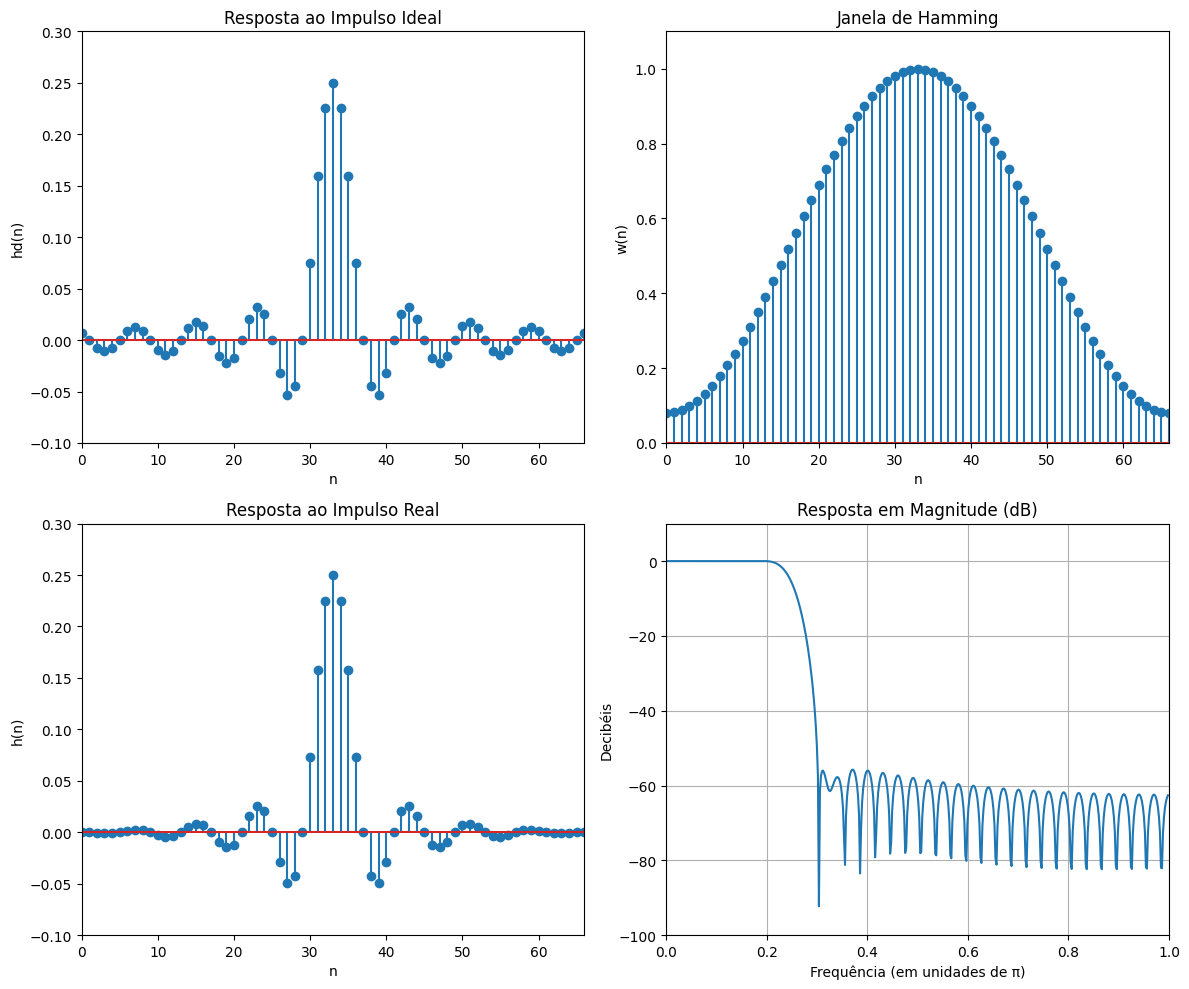

In [ ]:
# Exemplo 7.8: Projeto de Filtro Passa-Baixas FIR usando Janela de Hamming

#  1. Funções Auxiliares (Equivalentes ao MATLAB)
import numpy as np
from scipy.signal import freqz, kaiserord, firwin, lfilter
import matplotlib.pyplot as plt
from scipy.special import sinc

def ideal_lp(wc, M):
    """Resposta ao impulso do filtro passa-baixas ideal"""
    alpha = (M - 1) / 2
    n = np.arange(M)
    m = n - alpha
    fc = wc / np.pi
    return fc * sinc(fc * m)

def freqz_m(b, a=1, n_pts=501):
    """Versão modificada da função freqz"""
    w, H = freqz(b, a, worN=n_pts, whole=False)
    mag = np.abs(H)
    db = 20 * np.log10((mag + np.finfo(float).eps)/np.max(mag))
    pha = np.angle(H)
    grd = np.diff(np.unwrap(pha)) / np.diff(w)  # Aproximação do atraso de grupo
    return db, mag, pha, np.append(grd, grd[-1]), w

# 2. Especificações do Filtro
wp = 0.2 * np.pi  # Frequência de passagem
ws = 0.3 * np.pi  # Frequência de stopband
tr_width = ws - wp  # Largura da banda de transição

# Cálculo da ordem do filtro (fórmula empírica)
M = int(np.ceil(6.6 * np.pi / tr_width) + 1)
print(f"Ordem do filtro M = {M}")

# Frequência de corte ideal
wc = (ws + wp) / 2

## 3. Projeto do Filtro
# Resposta ao impulso ideal
n = np.arange(M)
hd = ideal_lp(wc, M)

# Aplicação da janela de Hamming
w_ham = np.hamming(M)
h = hd * w_ham

# Análise da resposta em frequência
db, mag, pha, grd, w = freqz_m(h)

# Cálculo dos parâmetros reais
delta_w = w[1] - w[0] # Use the actual frequency step from freqz
Rp = -np.min(db[:int(wp/delta_w) + 1])  # Ripple na passabanda
As = -np.round(np.max(db[int(ws/delta_w):]))  # Atenuação na stopband

print(f"Ripple na passabanda: {Rp:.4f} dB")
print(f"Atenuação na stopband: {As:.0f} dB")

# 4. Visualizações
plt.figure(figsize=(12, 10))

# Resposta ao impulso ideal
plt.subplot(2, 2, 1)
plt.stem(n, hd)
plt.title('Resposta ao Impulso Ideal')
plt.xlim([0, M-1])
plt.ylim([-0.1, 0.3])
plt.xlabel('n')
plt.ylabel('hd(n)')

# Janela de Hamming
plt.subplot(2, 2, 2)
plt.stem(n, w_ham)
plt.title('Janela de Hamming')
plt.xlim([0, M-1])
plt.ylim([0, 1.1])
plt.xlabel('n')
plt.ylabel('w(n)')

# Resposta ao impulso real
plt.subplot(2, 2, 3)
plt.stem(n, h)
plt.title('Resposta ao Impulso Real')
plt.xlim([0, M-1])
plt.ylim([-0.1, 0.3])
plt.xlabel('n')
plt.ylabel('h(n)')

# Resposta em magnitude (dB)
plt.subplot(2, 2, 4)
plt.plot(w/np.pi, db)
plt.title('Resposta em Magnitude (dB)')
plt.grid()
plt.xlim([0, 1])
plt.ylim([-100, 10])
plt.xlabel('Frequência (em unidades de π)')
plt.ylabel('Decibéis')

plt.tight_layout()
plt.show()

## Técnicas de Projeto por Amostragem em Frequência

### Conceito Central
O método de amostragem em frequência consiste em:
1. **Amostrar** a resposta em frequência ideal $H_d(e^{j\omega})$ em $M$ pontos igualmente espaçados
2. **Interpolar** essas amostras para obter o filtro FIR final
3. A resposta ao impulso é obtida via **TFD inversa**:

$$
h(n) = \text{IDFT}\{H(k)\}, \quad 0 \leq n \leq M-1
$$

### Características Principais
1. **Erro Zero** nas frequências amostradas
2. **Erro Maior** próximo às bordas de banda
3. **Dois Métodos**:
   - **Ingênuo**: Aceita o erro resultante
   - **Ótimo**: Otimiza amostras da banda de transição

##  Método Ingênuo

### Passos do Projeto
1. Amostrar a resposta ideal:
   $$ H(k) = H_d(e^{j2\pi k/M}), \quad k = 0,...,M-1 $$
2. Calcular a resposta ao impulso:
   $$ h(n) = \frac{1}{M} \sum_{k=0}^{M-1} H(k) e^{j2\pi kn/M} $$

### Limitações
- Ondulação indesejada na banda de rejeição
- Transição suave requer $M$ grande

##  Método Ótimo

### Técnica de Melhoria
1. **Amostras Livres**: Variar valores na banda de transição
2. **Otimização**: Maximizar atenuação na banda de rejeição
3. **Fórmula Geral**:
   $$ \text{minimize} \left( \max_{\omega \in \text{stopband}} |H(e^{j\omega})| \right) $$

### Vantagens
- Maior controle sobre a resposta
- Atenuação melhorada para mesmo $M$

## Tabela Comparativa
| Método       | Complexidade | Atenuação Típica | Uso de Recursos |
|--------------|--------------|------------------|-----------------|
| Ingênuo      | Baixa        | 20-40 dB         | Computação mínima |
| Ótimo        | Alta         | 50-80 dB         | Requer otimização |


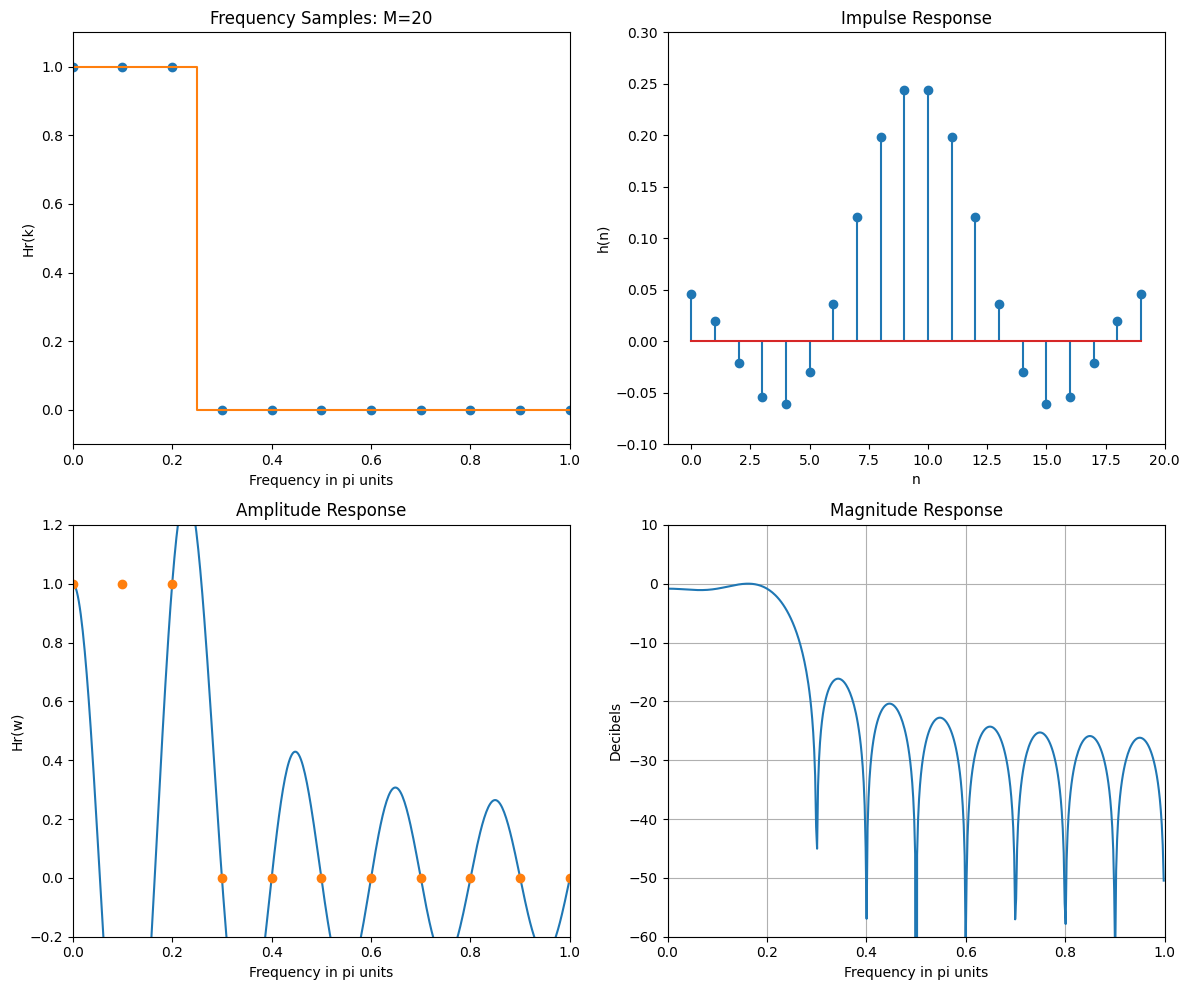

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, remez
from scipy.fft import ifft

def freqz_m(b, a=1, npts=512):
    w, H = freqz(b, a, worN=npts, whole=False)
    mag = np.abs(H)
    db = 20 * np.log10((mag + np.finfo(float).eps)/np.max(mag))
    pha = np.angle(H)
    grd = np.diff(np.unwrap(pha)) / np.diff(w)
    grd = np.append(grd, grd[-1])
    return db, mag, pha, grd, w

def hr_type2(h):
    M = len(h)
    L = M // 2
    Hr = np.zeros(500)
    w = np.linspace(0, np.pi, 500)

    for k in range(1, L+1):
        Hr += 2 * h[k-1] * np.cos((k - 0.5) * w)

    return Hr, w, None, L

# 7.4.1 Naive Design Method (Example 7.14)
M = 20
alpha = (M-1)/2
l = np.arange(M)
wl = (2*np.pi/M)*l

# Ideal amplitude response samples
Hrs = np.concatenate([np.ones(3), np.zeros(15), np.ones(2)])

# Create complex frequency samples
k1 = np.arange(0, (M-1)//2 + 1)
k2 = np.arange((M-1)//2 + 1, M)
angH = np.concatenate([
    -alpha * (2*np.pi)/M * k1,
    alpha * (2*np.pi)/M * (M - k2)
])
H = Hrs * np.exp(1j*angH)

# Compute impulse response
h = np.real(ifft(H))

# Frequency analysis
db, mag, pha, grd, w = freqz_m(h)
Hr, ww, _, _ = hr_type2(h)

# Plotting
plt.figure(figsize=(12, 10))

# Frequency samples
plt.subplot(2, 2, 1)
plt.plot(wl[:11]/np.pi, Hrs[:11], 'o', [0,0.25,0.25,1], [1,1,0,0])
plt.axis([0, 1, -0.1, 1.1])
plt.title('Frequency Samples: M=20')
plt.xlabel('Frequency in pi units')
plt.ylabel('Hr(k)')

# Impulse response
plt.subplot(2, 2, 2)
plt.stem(l, h)
plt.axis([-1, M, -0.1, 0.3])
plt.title('Impulse Response')
plt.xlabel('n')
plt.ylabel('h(n)')

# Amplitude response
plt.subplot(2, 2, 3)
plt.plot(ww/np.pi, Hr, wl[:11]/np.pi, Hrs[:11], 'o')
plt.axis([0, 1, -0.2, 1.2])
plt.title('Amplitude Response')
plt.xlabel('Frequency in pi units')
plt.ylabel('Hr(w)')

# Magnitude response
plt.subplot(2, 2, 4)
plt.plot(w/np.pi, db)
plt.axis([0, 1, -60, 10])
plt.grid()
plt.title('Magnitude Response')
plt.xlabel('Frequency in pi units')
plt.ylabel('Decibels')

plt.tight_layout()
plt.show()



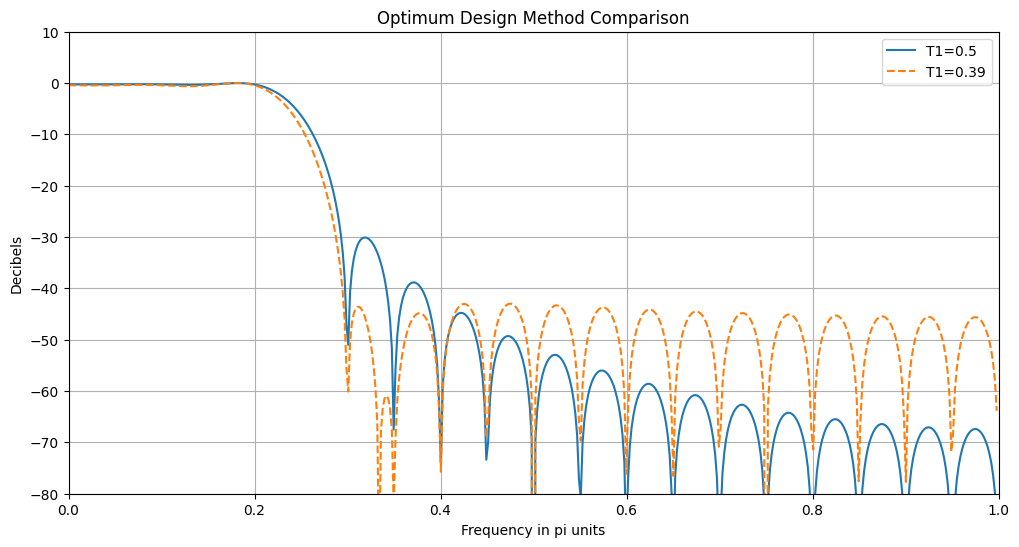

In [ ]:
# Optimum Design Method (Example 7.15)
plt.figure(figsize=(12, 6))

# Test different transition values
for T1, style in zip([0.5, 0.39], ['-', '--']):
    M = 40
    alpha = (M-1)/2
    Hrs = np.concatenate([np.ones(5), [T1], np.zeros(29), [T1], np.ones(4)])

    k1 = np.arange(0, (M-1)//2 + 1)
    k2 = np.arange((M-1)//2 + 1, M)
    angH = np.concatenate([
        -alpha * (2*np.pi)/M * k1,
        alpha * (2*np.pi)/M * (M - k2)
    ])
    H = Hrs * np.exp(1j*angH)
    h = np.real(ifft(H))

    db, _, _, _, w = freqz_m(h)
    plt.plot(w/np.pi, db, style, label=f'T1={T1}')

plt.axis([0, 1, -80, 10])
plt.grid()
plt.title('Optimum Design Method Comparison')
plt.xlabel('Frequency in pi units')
plt.ylabel('Decibels')
plt.legend()
plt.show()

#  Técnica de Projeto Ótimo Equiripple


### Problemas com Métodos Anteriores
1. **Precisão Limitada**: Dificuldade em especificar ωₚ e ω₅ exatos
2. **Controle de Ripple**: Impossibilidade de definir δ₁ e δ₂ simultaneamente
3. **Distribuição de Erro**: Erro maior nas bordas das bandas

### Solução Minimax
- **Objetivo**: Minimizar o erro máximo (Chebyshev) na banda de passagem e rejeição
- **Resultado**: Filtros equiripple com erro uniformemente distribuído

## Formulação do Problema

### Estrutura Matemática
Para filtros FIR com fase linear, a resposta em magnitude se decompõe em:
$$ H_r(ω) = Q(ω)P(ω) $$

Onde:
- $P(ω) = \sum_{n=0}^{L} α(n)\cos(ωn)$ (polinômio trigonométrico)
- $Q(ω)$ depende do tipo de filtro (I-IV)

### Problema de Otimização
$$ \min_{\text{coeficientes}} \left( \max_{ω∈S} |E(ω)| \right) $$

## Teorema da Alternância

### Condições Fundamentais
1. **Número de Extremos**:
   - Máximo de (L+3) frequências extremas em [0,π]
   - Inclui ωₚ, ω₅ e as oscilações

2. **Teorema**:
   - Solução única existe se E(ω) tiver (L+2) alternâncias
   - Alternância: Mudança de sinal no erro máximo (±δ)

## Algoritmo Parks-McClellan

### Passos do Algoritmo
1. **Estimativa Inicial**:
   - Ordem M via fórmula de Kaiser:
     $$ M ≈ \frac{-20\log_{10}(\sqrt{δ₁δ₂}) - 13}{2.285Δω} + 1 $$

2. **Iteração Remez**:
   - Ajuste de polinômios em extremos estimados
   - Redistribuição uniforme do erro
   - Convergência garantida para solução ótima


Delta1 (passband): 0.014390
Delta2 (stopband): 0.003162
Initial order estimate: N = 268
M=268: As_actual = 100.00 dB

Final design: M = 268 (order 267)
Achieved stopband attenuation: 100.00 dB


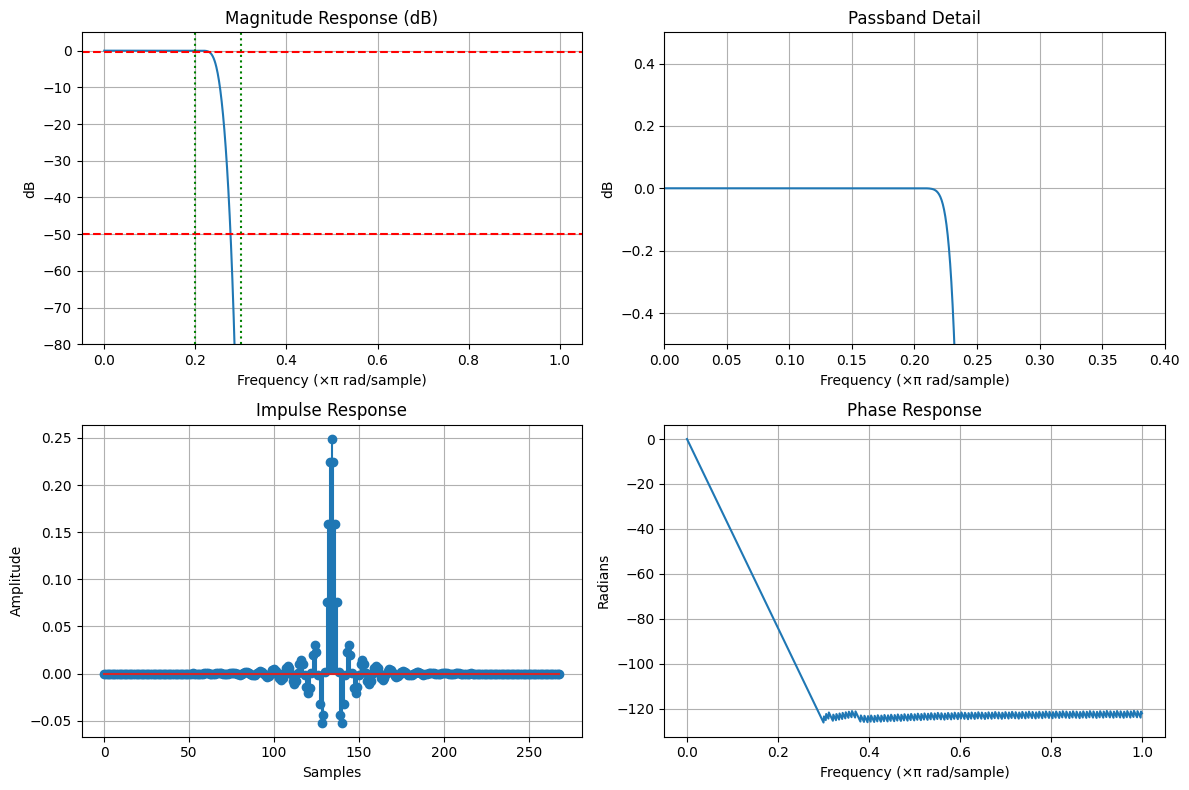

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import remez, freqz
from scipy.special import sinc

#  Parks-McClellan Filter Design (Example 7.8)

# 1. Specifications
wp = 0.2 * np.pi  # Passband edge (0.2π rad/sample)
ws = 0.3 * np.pi  # Stopband edge (0.3π rad/sample)
Rp = 0.25         # Passband ripple (dB)
As = 50           # Stopband attenuation (dB)

# 2. Convert Specifications to Linear Units
def db2delta(Rp, As):
    delta1 = (10**(Rp/20) - 1) / (10**(Rp/20) + 1)
    delta2 = 10**(-As/20)
    return delta1, delta2

delta1, delta2 = db2delta(Rp, As)
print(f"Delta1 (passband): {delta1:.6f}")
print(f"Delta2 (stopband): {delta2:.6f}")

# 3. Estimate Initial Filter Order
delta_f = (ws - wp) / (2 * np.pi)
# Increased the multiplier slightly to get a higher initial estimate
N_est = int(np.ceil((-10*np.log10(delta1*delta2) - 13)/(2.285*delta_f) + 1))
print(f"Initial order estimate: N = {N_est}")

# 4. Iterative Design Process
M = N_est
max_iterations = 50 # Added a limit to prevent infinite loops
iteration = 0

while iteration < max_iterations:
    try:
        # Design filter
        h = remez(
            numtaps=M+1,  # N+1 coefficients for order N
            bands=[0, wp/np.pi, ws/np.pi, 1], # Normalize frequencies by dividing by pi
            desired=[1, 0],
            weight=[delta2, delta1],
            fs=2 # Explicitly set sampling frequency to 2 for normalized frequencies
        )

        # Analyze frequency response
        w, H = freqz(h, worN=1000)
        H_db = 20 * np.log10(np.maximum(np.abs(H), 1e-5))

        # Calculate actual stopband attenuation
        # Find the index corresponding to ws
        ws_idx = np.searchsorted(w, ws)
        As_actual = -np.max(H_db[ws_idx:])


        print(f"M={M}: As_actual = {As_actual:.2f} dB")

        if As_actual >= As:
            break

        M += 1
        iteration += 1
    except ValueError as e:
        if "Failure to converge" in str(e):
            print(f"Convergence failed at M={M}. Increasing order.")
            M += 1
            iteration += 1
        else:
            raise e # Re-raise other ValueErrors

if iteration == max_iterations:
    print("\nCould not converge within maximum iterations. Consider relaxing specifications.")
else:
    # 5. Final Filter Analysis
    print(f"\nFinal design: M = {M} (order {M-1})")
    print(f"Achieved stopband attenuation: {As_actual:.2f} dB")

    # Frequency response analysis
    w, H = freqz(h, worN=1024)
    H_mag = np.abs(H)
    H_db = 20 * np.log10(H_mag)
    H_phase = np.angle(H)

    # 6. Visualization
    plt.figure(figsize=(12, 8))

    # Magnitude Response (dB)
    plt.subplot(2, 2, 1)
    plt.plot(w/np.pi, H_db)
    plt.axhline(-Rp, color='r', linestyle='--')
    plt.axhline(-As, color='r', linestyle='--')
    plt.axvline(wp/np.pi, color='g', linestyle=':')
    plt.axvline(ws/np.pi, color='g', linestyle=':')
    plt.title('Magnitude Response (dB)')
    plt.xlabel('Frequency (×π rad/sample)')
    plt.ylabel('dB')
    plt.ylim([-80, 5])
    plt.grid(True)

    # Passband Detail
    plt.subplot(2, 2, 2)
    plt.plot(w/np.pi, H_db)
    plt.xlim([0, 0.4])
    plt.ylim([-0.5, 0.5])
    plt.title('Passband Detail')
    plt.xlabel('Frequency (×π rad/sample)')
    plt.ylabel('dB')
    plt.grid(True)

    # Impulse Response
    plt.subplot(2, 2, 3)
    plt.stem(np.arange(M+1), h) # Removed use_line_collection
    plt.title('Impulse Response')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # Phase Response
    plt.subplot(2, 2, 4)
    plt.plot(w/np.pi, np.unwrap(H_phase))
    plt.title('Phase Response')
    plt.xlabel('Frequency (×π rad/sample)')
    plt.ylabel('Radians')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Delta1 (passband): 0.057501
Delta2 (stopband): 0.001000
Initial order estimate (N): 173
N=173: Achieved As = 100.00 dB

Final design: N = 173 (M = 174 coefficients)
Achieved stopband attenuation (final design): 100.00 dB


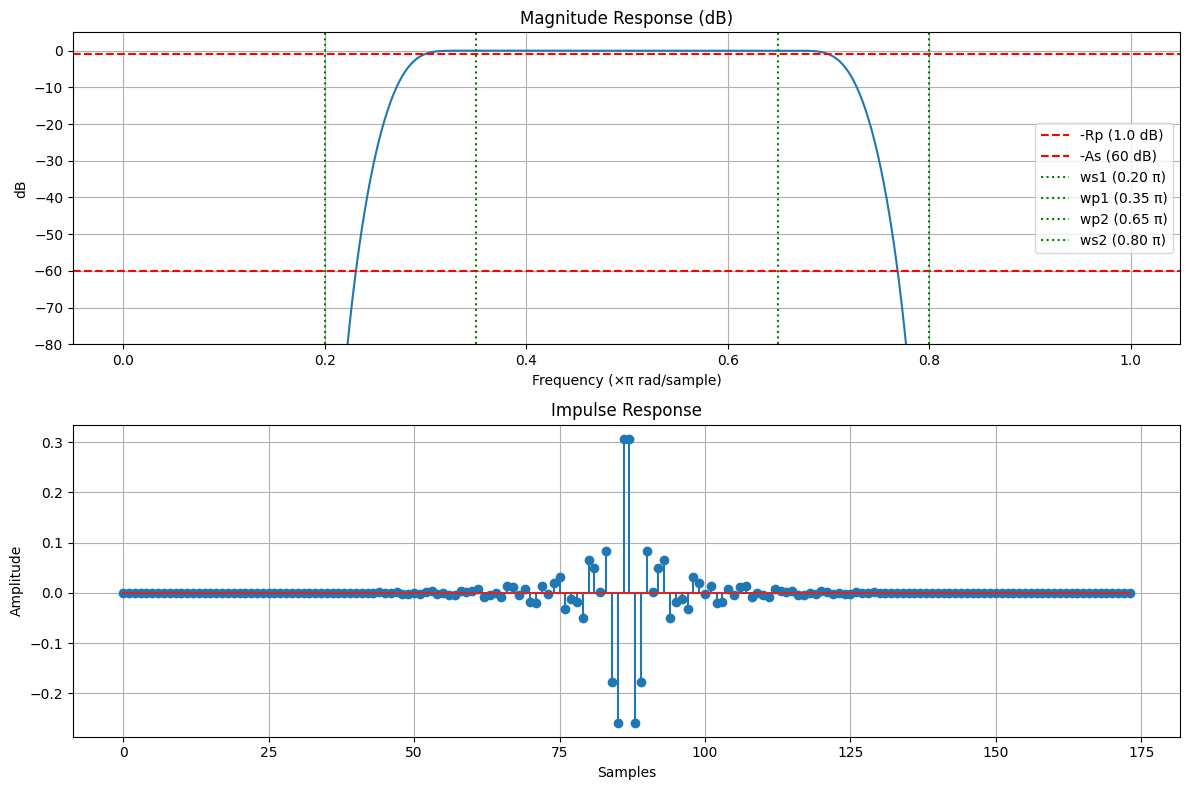

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import remez, freqz
# Exemplo 7.24

# 1. Specifications
ws1 = 0.2 * np.pi
wp1 = 0.35 * np.pi
wp2 = 0.65 * np.pi
ws2 = 0.8 * np.pi
Rp = 1.0
As = 60

# 2. Convert Specifications to Linear Units
delta1, delta2 = db2delta(Rp, As)
print(f"Delta1 (passband): {delta1:.6f}")
print(f"Delta2 (stopband): {delta2:.6f}")

# 3. Estimate Initial Filter Order using empirical formula
transition_width = min(wp1-ws1, ws2-wp2) / (2*np.pi)
# Formula based on Kaiser window, often used for initial remez estimate
N_est = int(np.ceil((-20*np.log10(np.sqrt(delta1*delta2)) - 13)/(2.285*transition_width) + 1))
print(f"Initial order estimate (N): {N_est}")

# 4. Iterative Design Process
N_iter = N_est # Start with the estimated order
max_iterations = 300 # Limit iterations to prevent infinite loop
iteration = 0
h = None # Initialize filter coefficients

while iteration < max_iterations:
    try:
        h_iter = remez(
            numtaps=N_iter + 1,
            bands=[0, ws1/np.pi, wp1/np.pi, wp2/np.pi, ws2/np.pi, 1],
            desired=[0, 1, 0],
            weight=[1/delta2, 1/delta1, 1/delta2],
            fs=2
        )

        w, H = freqz(h_iter, worN=2000)
        H_db = 20 * np.log10(np.maximum(np.abs(H), 1e-5)) # Add small value to avoid log(0)

        # Calculate actual stopband attenuation
        # Find the index corresponding to ws1 and ws2 in the frequency vector 'w'
        # 'w' is in radians/sample
        ws1_idx = np.searchsorted(w, ws1)
        ws2_idx = np.searchsorted(w, ws2)

        # Check attenuation in the two stopbands
        Asd_lower = -np.max(H_db[:ws1_idx])
        Asd_upper = -np.max(H_db[ws2_idx:])
        Asd_iter = min(Asd_lower, Asd_upper)

        print(f"N={N_iter}: Achieved As = {Asd_iter:.2f} dB")

        if Asd_iter >= As:
            h = h_iter # Update h with the final filter
            break

        N_iter += 1
        iteration += 1

    except ValueError as e:
        if "Failure to converge" in str(e):
            print(f"Convergence failed at N={N_iter}. Increasing order.")
            N_iter += 1
            iteration += 1
        else:
            raise e # Re-raise other ValueErrors
    except Exception as e:
        print(f"An unexpected error occurred at N={N_iter}: {e}")
        N_iter += 1
        iteration += 1


if iteration == max_iterations:
    print("\nCould not converge within maximum iterations. Consider relaxing specifications.")
elif h is not None:
    # 5. Final Filter Analysis and Visualization
    print(f"\nFinal design: N = {N_iter} (M = {N_iter+1} coefficients)")
    print(f"Achieved stopband attenuation (final design): {Asd_iter:.2f} dB")

    # Frequency response analysis for the final filter
    # Use freqz with the final filter h
    w, H = freqz(h, worN=1024)
    H_mag = np.abs(H)
    H_db = 20 * np.log10(H_mag)
    H_phase = np.angle(H)

    # 6. Visualization
    plt.figure(figsize=(12, 8))

    # Magnitude Response (dB)
    plt.subplot(2, 1, 1)
    # Plot w in units of pi
    plt.plot(w/np.pi, H_db)
    plt.axhline(-Rp, color='r', linestyle='--', label=f'-Rp ({Rp} dB)')
    plt.axhline(-As, color='r', linestyle='--', label=f'-As ({As} dB)')
    plt.axvline(ws1/np.pi, color='g', linestyle=':', label=f'ws1 ({ws1/np.pi:.2f} π)')
    plt.axvline(wp1/np.pi, color='g', linestyle=':', label=f'wp1 ({wp1/np.pi:.2f} π)')
    plt.axvline(wp2/np.pi, color='g', linestyle=':', label=f'wp2 ({wp2/np.pi:.2f} π)')
    plt.axvline(ws2/np.pi, color='g', linestyle=':', label=f'ws2 ({ws2/np.pi:.2f} π)')
    plt.title('Magnitude Response (dB)')
    plt.xlabel('Frequency (×π rad/sample)')
    plt.ylabel('dB')
    plt.ylim([-80, 5])
    plt.grid(True)
    plt.legend() # Add legend

    # Impulse Response
    plt.subplot(2, 1, 2)
    plt.stem(np.arange(len(h)), h)
    plt.title('Impulse Response')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("\nFilter design did not succeed within the maximum number of iterations.")